# 🎺 Ensembles! 🎺

In random forests we saw how combining a lot of 'dumber' models can lead to one that's purty smart.

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

## Bagging

Overview of bagging
* Take bootstrap samples of data and fit a model to each
  * Can be same model (like in random forest)
* Make predictions with those models
* Aggregate predictions

<p align='center'><img src='https://i.imgur.com/hBgdCwQ.png' width=70%></p>


## Stacking

Overview of stacking
* Build some models
* Make predictions with those models
* Use those predictions as the input to a final model

<p align='center'><img src='https://i.imgur.com/hnRj4DJ.png' width=70%></p>

Let's say we've built 2 models and made predictions with them.  The below dataframe shows the right answer, `y`, and the predictions of our 2 modeling attempts.

In [4]:
# fmt: off
pred_df = pd.DataFrame(
    {
        "y": [
            -5.73, -2.65, 7.53, 8.97, 10.79, 4.56, 
            8.87, 11.91, 8.91, 8.99, 10.8, 2.18, 
            24.44, 22.61, 20.06, 21.47, 25.75, 24.91, 
            14.41, 10.36, 21.98, 33.53, 21.35, 21.87, 
            29.13, 23.54, 42.12, 32.75, 29.38, 31.23,
        ],
        "model_a_pred": [
            4.1, 3.15, 21.33, 6.55, 16.64, 16.48, 
            22.55, 26.45, 18.74, 15.47, 16.51, 17.76, 
            29.4, 32.78, 31.84, 30.69, 28.66, 32.44, 
            25.63, 15.43, 38.05, 42.85, 38.69, 37.03, 
            29.76, 41.02, 44.91, 42.19, 43.26, 38.92,
        ],
        "model_b_pred": [
            -16.19, -9.36, -6.94, -1.43, 3.3, -4.96, 
            3.63, 6.95, -5.67, 5.03, -2.34, -14.79, 
            20.28, 10.72, 8.71, 10.13, 15.22, 10.25, 
            11.54, -1.74, 11.13, 18.08, 12.73, 14.25, 
            21.36, 17.86, 25.68, 23.14, 19.25, 20.36,
        ],
    }
)
# fmt: on

pred_df.head()

,y,model_a_pred,model_b_pred
0,-5.73,4.10,-16.19
1,-2.65,3.15,-9.36
2,7.53,21.33,-6.94
3,8.97,6.55,-1.43
4,10.79,16.64,3.30


<IPython.core.display.Javascript object>

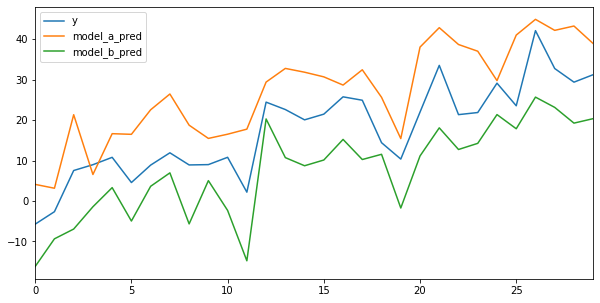

<IPython.core.display.Javascript object>

In [5]:
pred_df.plot(figsize=(10, 5))
plt.show()

Model A is systematically over predicting while Model B is under predicting.  In practice, we might do something fancier, but here we might use an average as our second level of model.  In doing this we're 'stacking' our models on top of each other.  The first level in the stack contains Model A and Model B, the second level contains our simple average 'model'.  We see this ends up with much better predictions.

In [7]:
pred_df["ensemble_pred"] = (pred_df["model_a_pred"] + pred_df["model_b_pred"]) / 2
pred_df.head()

,y,model_a_pred,model_b_pred,ensemble_pred
0,-5.73,4.10,-16.19,-6.045
1,-2.65,3.15,-9.36,-3.105
2,7.53,21.33,-6.94,7.195
3,8.97,6.55,-1.43,2.560
4,10.79,16.64,3.30,9.970


<IPython.core.display.Javascript object>

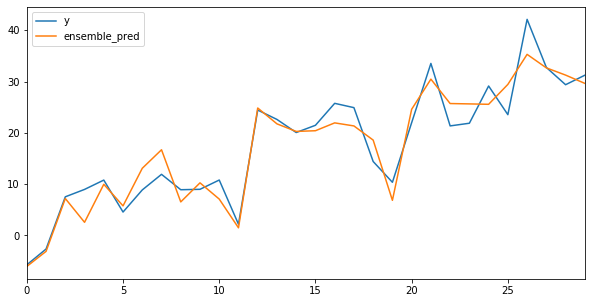

<IPython.core.display.Javascript object>

In [8]:
pred_df[["y", "ensemble_pred"]].plot(figsize=(10, 5))
plt.show()

## Boosting 🚀

<p align='center'><img src='https://i.imgur.com/RewteYv.png' width=70%></p>

Overview
* Build a model
* See where you made mistakes
* Let those mistakes guide how you build the next model
* Combine the models and make predictions